In [1]:
%pylab inline
import numpy as np
from numpy.linalg import svd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:
def featureNormalize(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    # calculates mean and standard deviation
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    # normalized each matrix element to have them normally distributed N(0,1) (mean=0, std=1)
    X_norm = (X - mu) #/ sigma
    
    return X_norm, mu, sigma

In [3]:
def covariance(X):
    m, n = X.shape[0], X.shape[1]
    
    X_cov = (1/m) * X.T @ X
    
    return X_cov

In [4]:
def pca(X):
    """
    Computes eigenvectors of the covariance matrix of X
    """
    sigma = covariance(X)
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [395]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    """
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    """
    Z = X @ U_reduced
    
    return Z     # Project the data onto K=1 dimension

In [396]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    """
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    """
    X_rec = Z @ U_reduced.T
    
    return X_rec

In [338]:
def show_vectors(matrix, k:int, title:str):
    """Shows first K vectors as an reshaped 32x32 dimensional images from X matrix"""

    # calculate dimension of plot matrix which fits all K feature representations (as images) which will look like as eigenfaces
    PLOT_MATRIX_DIM = 2 if k==1 else int(np.ceil(np.sqrt(k)))

    # take matrix of only that first K features
    reduced_matrix = matrix[:,:k].T

    # plotting compressed images
    fig2, ax2 = plt.subplots(PLOT_MATRIX_DIM, PLOT_MATRIX_DIM, figsize=(18,18))

    for i in range(0, PLOT_MATRIX_DIM**2, PLOT_MATRIX_DIM):
        for j in range(PLOT_MATRIX_DIM):
            if i + j < k:
                reshaped_image = reduced_matrix[i+j,:].reshape(32,32,order="F")
                ax2[int(i/PLOT_MATRIX_DIM),j].imshow(reshaped_image,cmap="gray")
                ax2[int(i/PLOT_MATRIX_DIM),j].axis("off")
    _ = fig2.suptitle(title, fontsize=30)
                

In [462]:
X = np.zeros([5000, 1024], dtype=float)
#print(X[0,0])
for i in range(5000):
    for j in range(16):
        jFrom = j * 64
        jTo = (j + 1) * 64
        #print (jFrom, jTo)
        X[i, jFrom:jTo] = repeat(np.random.random(1), 64)

X.shape, X

((5000, 1024),
 array([[0.67011468, 0.67011468, 0.67011468, ..., 0.04931596, 0.04931596,
         0.04931596],
        [0.84452788, 0.84452788, 0.84452788, ..., 0.49225071, 0.49225071,
         0.49225071],
        [0.14947822, 0.14947822, 0.14947822, ..., 0.23317678, 0.23317678,
         0.23317678],
        ...,
        [0.78869688, 0.78869688, 0.78869688, ..., 0.6501352 , 0.6501352 ,
         0.6501352 ],
        [0.11697198, 0.11697198, 0.11697198, ..., 0.46921723, 0.46921723,
         0.46921723],
        [0.94149359, 0.94149359, 0.94149359, ..., 0.15629324, 0.15629324,
         0.15629324]]))

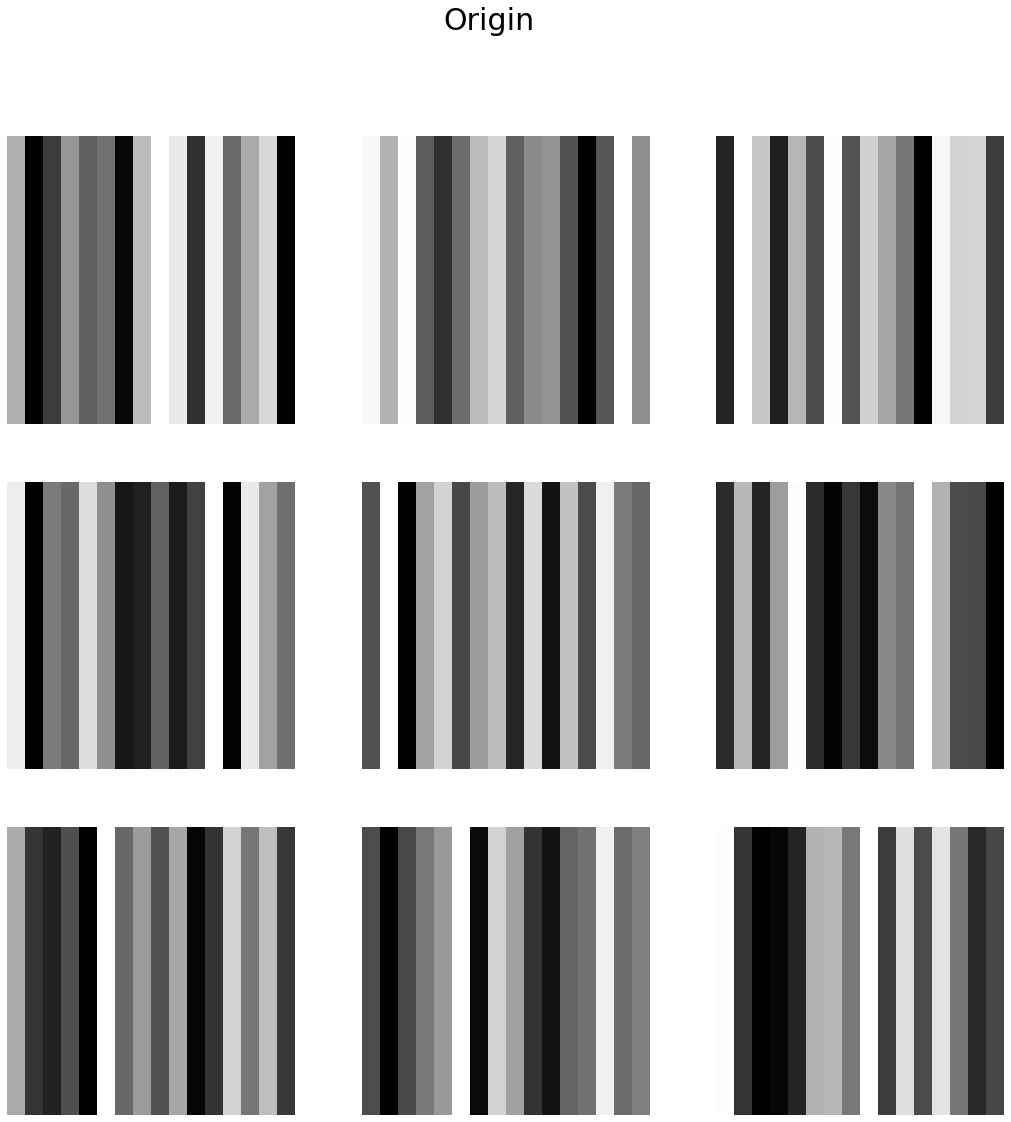

In [463]:
show_vectors(X.T, 9, "Origin")

In [464]:
X_norm, _, _ = np.array(featureNormalize(X))

In [465]:
X_norm.shape

(5000, 1024)

In [466]:
(X_norm.T @ X_norm).shape

(1024, 1024)

In [467]:
U, S, V = pca(X_norm)

In [468]:
U

array([[ 3.82699339e-02, -1.68127876e-03,  1.11271879e-02, ...,
        -6.23662143e-19, -4.62585447e-20, -5.94447115e-03],
       [ 3.82699339e-02, -1.68127876e-03,  1.11271879e-02, ...,
        -2.22559475e-18, -1.90318719e-19,  1.32358084e-01],
       [ 3.82699339e-02, -1.68127876e-03,  1.11271879e-02, ...,
         6.71190044e-19,  2.69971101e-20, -5.45586264e-02],
       ...,
       [-2.86305347e-02, -2.81151496e-02, -1.23371145e-03, ...,
        -1.66666667e-01, -1.66666667e-01, -1.00682108e-17],
       [-2.86305347e-02, -2.81151496e-02, -1.23371145e-03, ...,
         8.33333333e-01, -1.66666667e-01, -1.00682108e-17],
       [-2.86305347e-02, -2.81151496e-02, -1.23371145e-03, ...,
        -1.66666667e-01,  8.33333333e-01, -1.00682108e-17]])

In [469]:
S, S.shape, S.shape[0]

(array([5.79731072e+00, 5.72857060e+00, 5.66199288e+00, ...,
        5.39062028e-16, 5.39062028e-16, 4.61768782e-17]), (1024,), 1024)

In [470]:
V

array([[ 3.82699339e-02,  3.82699339e-02,  3.82699339e-02, ...,
        -2.86305347e-02, -2.86305347e-02, -2.86305347e-02],
       [-1.68127876e-03, -1.68127876e-03, -1.68127876e-03, ...,
        -2.81151496e-02, -2.81151496e-02, -2.81151496e-02],
       [ 1.11271879e-02,  1.11271879e-02,  1.11271879e-02, ...,
        -1.23371145e-03, -1.23371145e-03, -1.23371145e-03],
       ...,
       [ 0.00000000e+00, -1.12435642e-18, -1.57407187e-18, ...,
        -7.07106781e-01,  7.07106781e-01, -6.87250084e-18],
       [ 0.00000000e+00,  2.77613239e-07, -2.13258565e-06, ...,
        -2.36783377e-03, -2.36783377e-03, -8.43530343e-06],
       [ 0.00000000e+00, -5.51950929e-01,  6.88412082e-02, ...,
        -3.47489041e-02, -3.47489041e-02, -3.47489041e-02]])

<BarContainer object of 50 artists>

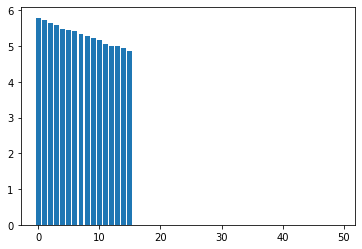

In [472]:
plt.bar(range(50), S[:50])

In [505]:
K = 15

In [506]:
Z = projectData(X_norm, U, K)
Z, Z.shape

(array([[ 0.45138319,  2.9156929 ,  4.86516671, ...,  2.3685249 ,
         -1.09172355, -0.54286513],
        [ 1.84472512, -0.89231706, -0.73185435, ..., -0.29195694,
          1.35806525, -0.17803349],
        [-0.97568545, -0.78088693, -1.38536208, ...,  0.46757603,
         -5.17966987,  1.71756256],
        ...,
        [-3.28181837, -0.8689278 ,  3.87291245, ..., -2.44480852,
         -2.23004433, -1.35563684],
        [-0.06478081,  0.96792123,  0.67664842, ...,  3.5257477 ,
          0.3496306 ,  0.99520254],
        [ 0.80541334, -0.8468581 ,  4.19052912, ...,  3.05095141,
         -1.31506229, -0.30482467]]), (5000, 15))

In [507]:
X_rec = recoverData(Z, U, K)

In [508]:
X_rec, X_rec.shape

(array([[ 0.04374244,  0.04374244,  0.04374244, ..., -0.46820969,
         -0.46820969, -0.46820969],
        [ 0.4112401 ,  0.4112401 ,  0.4112401 , ...,  0.01176616,
          0.01176616,  0.01176616],
        [-0.19527225, -0.19527225, -0.19527225, ..., -0.23032288,
         -0.23032288, -0.23032288],
        ...,
        [ 0.26203458,  0.26203458,  0.26203458, ...,  0.15173779,
          0.15173779,  0.15173779],
        [-0.40370942, -0.40370942, -0.40370942, ..., -0.02803281,
         -0.02803281, -0.02803281],
        [ 0.46743997,  0.46743997,  0.46743997, ..., -0.33201178,
         -0.33201178, -0.33201178]]), (5000, 1024))

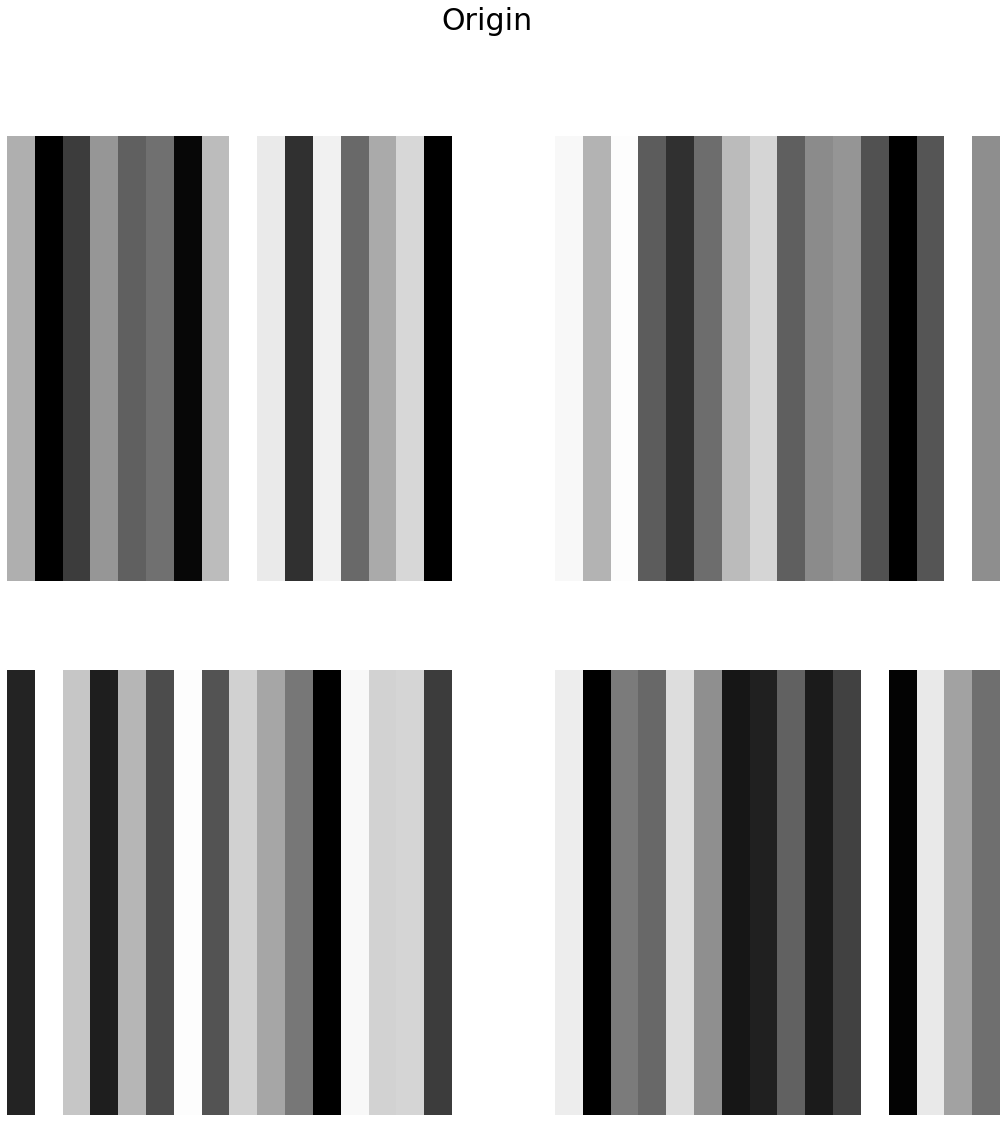

In [509]:
show_vectors(X.T, 4, "Origin")

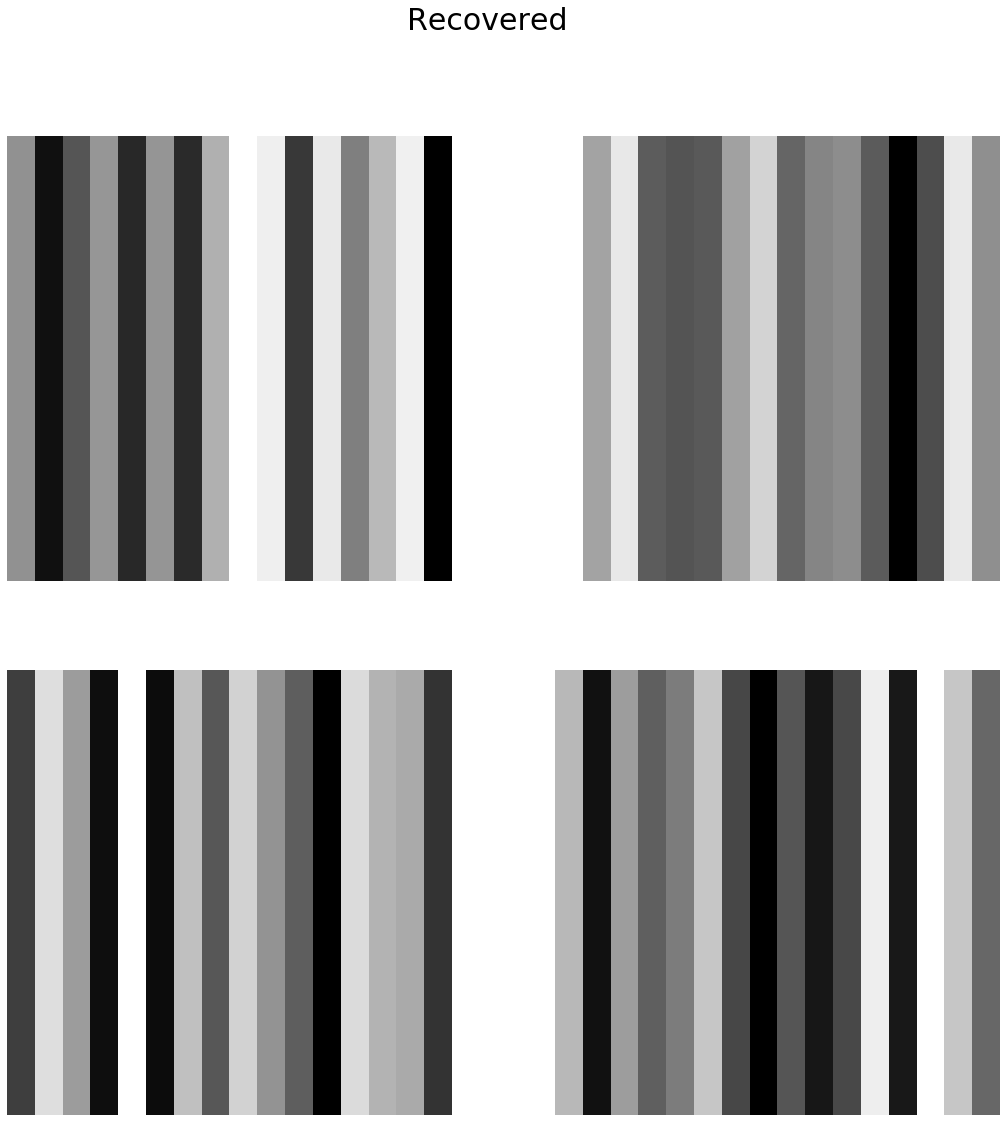

In [510]:
show_vectors(X_rec.T, 4, "Recovered")